# Exploratory Data Analysis (EDA) and Data Visualization
## Module 4, Lab 2: Understanding Your Data

Exploratory Data Analysis (EDA) is one of the most critical steps in any machine learning project. Before building models, you need to understand your data thoroughly. This lab will teach you how to explore datasets, identify patterns, and create meaningful visualizations.

### Learning Objectives
By the end of this lab, you will be able to:
- Load and examine datasets using pandas
- Identify data quality issues (missing values, duplicates, outliers)
- Calculate and interpret summary statistics
- Create effective visualizations using matplotlib and seaborn
- Draw insights from data exploration

### Business Problem
We'll analyze a customer dataset to understand purchasing behavior and demographics. This type of analysis helps businesses make data-driven decisions about marketing, product development, and customer segmentation.

## Setup and Data Loading

In [ ]:
# Install required packages
%pip install pandas numpy matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


### Loading the Dataset
We'll create a realistic customer dataset for our analysis.

In [70]:
# Create a synthetic customer dataset
np.random.seed(42)
n_customers = 1000

# Generate customer data
customer_data = {
    'customer_id': range(1, n_customers + 1),
    'age': np.random.normal(40, 15, n_customers).astype(int),
    'gender': np.random.choice(['Male', 'Female', 'Other'], n_customers, p=[0.48, 0.50, 0.02]),
    'income': np.random.lognormal(10.5, 0.5, n_customers),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 
                                 n_customers, p=[0.3, 0.4, 0.25, 0.05]),
    'city_tier': np.random.choice(['Tier 1', 'Tier 2', 'Tier 3'], 
                                 n_customers, p=[0.3, 0.4, 0.3]),
    'years_as_customer': np.random.exponential(3, n_customers),
    'total_purchases': np.random.poisson(12, n_customers),
    'avg_order_value': np.random.gamma(2, 50, n_customers),
    'satisfaction_score': np.random.normal(7.5, 1.5, n_customers)
}

# Create DataFrame
df = pd.DataFrame(customer_data)

# Add some realistic constraints
df['age'] = np.clip(df['age'], 10, 60)
df['income'] = np.clip(df['income'], 10000, 150000)
df['years_as_customer'] = np.clip(df['years_as_customer'], 0, 20)
df['satisfaction_score'] = np.clip(df['satisfaction_score'], 1, 100)

# Calculate total spending
df['total_spending'] = df['total_purchases'] * df['avg_order_value']

# Introduce some missing values (realistic scenario)
missing_indices = np.random.choice(df.index, size=75, replace=False)
df.loc[missing_indices, 'satisfaction_score'] = np.nan

# Add some duplicates (data quality issue)
duplicate_rows = df.sample(5).copy()
df = pd.concat([df, duplicate_rows], ignore_index=True)

print(f"Dataset created with {len(df)} customers")
print(f"Dataset shape: {df.shape}")

Dataset created with 1005 customers
Dataset shape: (1005, 11)


## Step 1: Initial Data Exploration
Let's start by getting familiar with our dataset.

In [71]:
# Display first few rows
print("First 10 rows of the dataset:")
display(df.head(10))

print("\nLast 20 rows of the dataset:")
display(df.tail(20))

First 10 rows of the dataset:


,customer_id,age,gender,income,education,city_tier,years_as_customer,total_purchases,avg_order_value,satisfaction_score,total_spending
0,1,47,Male,31113.449406,High School,Tier 2,0.471771,12,58.249722,9.076161,698.996661
1,2,37,Male,24932.359005,Bachelor,Tier 2,6.289826,22,39.964016,6.902278,879.208350
2,3,49,Female,42599.051008,Bachelor,Tier 1,2.253532,12,56.137914,5.812590,673.654965
3,4,60,Female,70985.096321,High School,Tier 1,1.889171,13,80.487029,6.999362,1046.331379
4,5,36,Male,14220.128860,High School,Tier 1,0.338538,8,84.832080,8.859273,678.656638
5,6,36,Female,38465.347097,Master,Tier 2,3.145663,10,130.529138,7.090468,1305.291379
6,7,60,Male,33521.208338,High School,Tier 1,6.074851,13,78.625894,7.049333,1022.136621
7,8,51,Female,50800.934965,Bachelor,Tier 1,5.284026,15,71.979226,7.050521,1079.688397
8,9,32,Female,40400.535310,Master,Tier 2,2.950937,11,60.587517,9.020103,666.462684
9,10,48,Female,24934.691211,High School,Tier 3,0.234789,9,121.287605,9.440055,1091.588449



Last 20 rows of the dataset:


,customer_id,age,gender,income,education,city_tier,years_as_customer,total_purchases,avg_order_value,satisfaction_score,total_spending
985,986,22,Male,25001.993151,Bachelor,Tier 2,0.714003,13,65.422612,8.207293,850.493954
986,987,60,Male,33243.446152,Master,Tier 2,4.718447,10,61.852326,NaN,618.523255
987,988,53,Male,16742.251791,Bachelor,Tier 2,0.620730,12,95.271948,6.527310,1143.263372
988,989,36,Male,28407.916248,Master,Tier 2,0.206957,10,130.701024,7.847043,1307.010241
989,990,40,Male,31494.312511,Bachelor,Tier 1,19.631017,6,80.224993,9.565329,481.349955
990,991,43,Female,31949.446118,Master,Tier 2,0.075391,9,34.424915,8.644213,309.824231
991,992,10,Male,32184.854929,Master,Tier 1,5.409870,7,212.130196,NaN,1484.911371
992,993,36,Female,35211.143918,Bachelor,Tier 2,1.364124,12,267.722416,6.012341,3212.668991
993,994,29,Male,46153.162265,High School,Tier 1,5.528188,12,74.298771,6.460817,891.585255
994,995,24,Female,56232.971034,High School,Tier 2,2.426486,13,107.829301,5.589386,1401.780917


In [72]:
# Get basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nDataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         1005 non-null   int64  
 1   age                 1005 non-null   int64  
 2   gender              1005 non-null   object 
 3   income              1005 non-null   float64
 4   education           1005 non-null   object 
 5   city_tier           1005 non-null   object 
 6   years_as_customer   1005 non-null   float64
 7   total_purchases     1005 non-null   int32  
 8   avg_order_value     1005 non-null   float64
 9   satisfaction_score  929 non-null    float64
 10  total_spending      1005 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 82.6+ KB
None

Dataset Shape:
Rows: 1005, Columns: 11

Column Names:
['customer_id', 'age', 'gender', 'income', 'education', 'city_tier', 'years_as_customer', 'total_purchases', 

In [73]:
# Check data types
print("Data Types:")
print(df.dtypes)

print("\nNumerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

print("\nCategorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

Data Types:
customer_id             int64
age                     int64
gender                 object
income                float64
education              object
city_tier              object
years_as_customer     float64
total_purchases         int32
avg_order_value       float64
satisfaction_score    float64
total_spending        float64
dtype: object

Numerical Columns:
['customer_id', 'age', 'income', 'years_as_customer', 'total_purchases', 'avg_order_value', 'satisfaction_score', 'total_spending']

Categorical Columns:
['gender', 'education', 'city_tier']


## Step 2: Data Quality Assessment
Before analyzing the data, we need to identify and understand data quality issues.

In [74]:
# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

Missing Values:
                    Missing Count  Missing Percentage
satisfaction_score             76            7.562189


In [75]:
# Check for duplicate rows
print(f"Total rows: {len(df)}")
print(f"Unique rows: {len(df.drop_duplicates())}")
print(f"Duplicate rows: {len(df) - len(df.drop_duplicates())}")

if len(df) != len(df.drop_duplicates()):
    print("\nDuplicate rows found:")
    duplicates = df[df.duplicated(keep=False)]
    print(duplicates.sort_values('customer_id'))

Total rows: 1005
Unique rows: 1000
Duplicate rows: 5

Duplicate rows found:
      customer_id  age  gender        income education city_tier  \
21             22   36  Female  46833.896860  Bachelor    Tier 2   
1004           22   36  Female  46833.896860  Bachelor    Tier 2   
1003          286   10    Male  67377.429094  Bachelor    Tier 1   
285           286   10    Male  67377.429094  Bachelor    Tier 1   
643           644   17    Male  30728.977611  Bachelor    Tier 3   
1001          644   17    Male  30728.977611  Bachelor    Tier 3   
809           810   26    Male  11808.269062  Bachelor    Tier 2   
1002          810   26    Male  11808.269062  Bachelor    Tier 2   
934           935   46  Female  96478.813777    Master    Tier 2   
1000          935   46  Female  96478.813777    Master    Tier 2   

      years_as_customer  total_purchases  avg_order_value  satisfaction_score  \
21             3.994514               11        42.648150            8.604621   
1004         

In [76]:
# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.10)
    Q3 = df[column].quantile(0.80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Detection (using IQR method):")
for col in ['age', 'income', 'total_spending']:
    outliers, lower, upper = detect_outliers(df, col)
    print(f"\n{col}:")
    print(f"  Normal range: {lower:.2f} to {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

Outlier Detection (using IQR method):

age:
  Normal range: -25.50 to 98.50
  Number of outliers: 0
  Percentage of outliers: 0.00%

income:
  Normal range: -33115.12 to 107382.64
  Number of outliers: 11
  Percentage of outliers: 1.09%

total_spending:
  Normal range: -1914.47 to 3983.87
  Number of outliers: 15
  Percentage of outliers: 1.49%


## Step 3: Summary Statistics
Let's calculate and interpret summary statistics for our numerical variables.

In [77]:
# Basic summary statistics
print("Summary Statistics for Numerical Variables:")
summary_stats = df.describe()
display(summary_stats.round(1))

Summary Statistics for Numerical Variables:


,customer_id,age,income,years_as_customer,total_purchases,avg_order_value,satisfaction_score,total_spending
count,1005.0,1005.0,1005.0,1005.0,1005.0,1005.0,929.0,1005.0
mean,500.7,39.2,41129.1,3.0,12.0,100.6,7.5,1194.7
std,289.1,13.3,21034.5,3.1,3.4,70.0,1.5,887.0
min,1.0,10.0,10000.0,0.0,3.0,1.1,3.0,8.9
25%,251.0,30.0,26350.9,0.8,10.0,50.6,6.5,572.6
50%,501.0,40.0,36444.0,2.1,12.0,84.0,7.4,964.5
75%,751.0,49.0,50673.4,4.3,14.0,133.6,8.4,1563.6
max,1000.0,60.0,150000.0,20.0,23.0,464.3,12.8,6268.8


In [78]:
# Additional statistics
print("Additional Statistics:")
additional_stats = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis(),
    'Variance': df[numerical_cols].var()
})
display(additional_stats.round(3))

Additional Statistics:


,Skewness,Kurtosis,Variance
customer_id,-0.002,-1.202,8.357904e+04
age,-0.195,-0.741,1.758110e+02
income,1.598,4.182,4.424506e+08
years_as_customer,1.899,4.770,9.457000e+00
total_purchases,0.328,-0.035,1.168500e+01
avg_order_value,1.443,2.818,4.905801e+03
satisfaction_score,-0.011,0.211,2.136000e+00
total_spending,1.606,3.718,7.867163e+05


In [80]:
# Summary for categorical variables
print("Summary for Categorical Variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })
    print(summary.round(1))

Summary for Categorical Variables:

gender:
        Count  Percentage
gender                   
Female    519        51.6
Male      465        46.3
Other      21         2.1

education:
             Count  Percentage
education                     
Bachelor       434        43.2
High School    309        30.7
Master         220        21.9
PhD             42         4.2

city_tier:
           Count  Percentage
city_tier                   
Tier 2       410        40.8
Tier 3       301        30.0
Tier 1       294        29.3


## Step 4: Data Visualization
Now let's create visualizations to better understand our data patterns.

### 4.1 Distribution of Numerical Variables

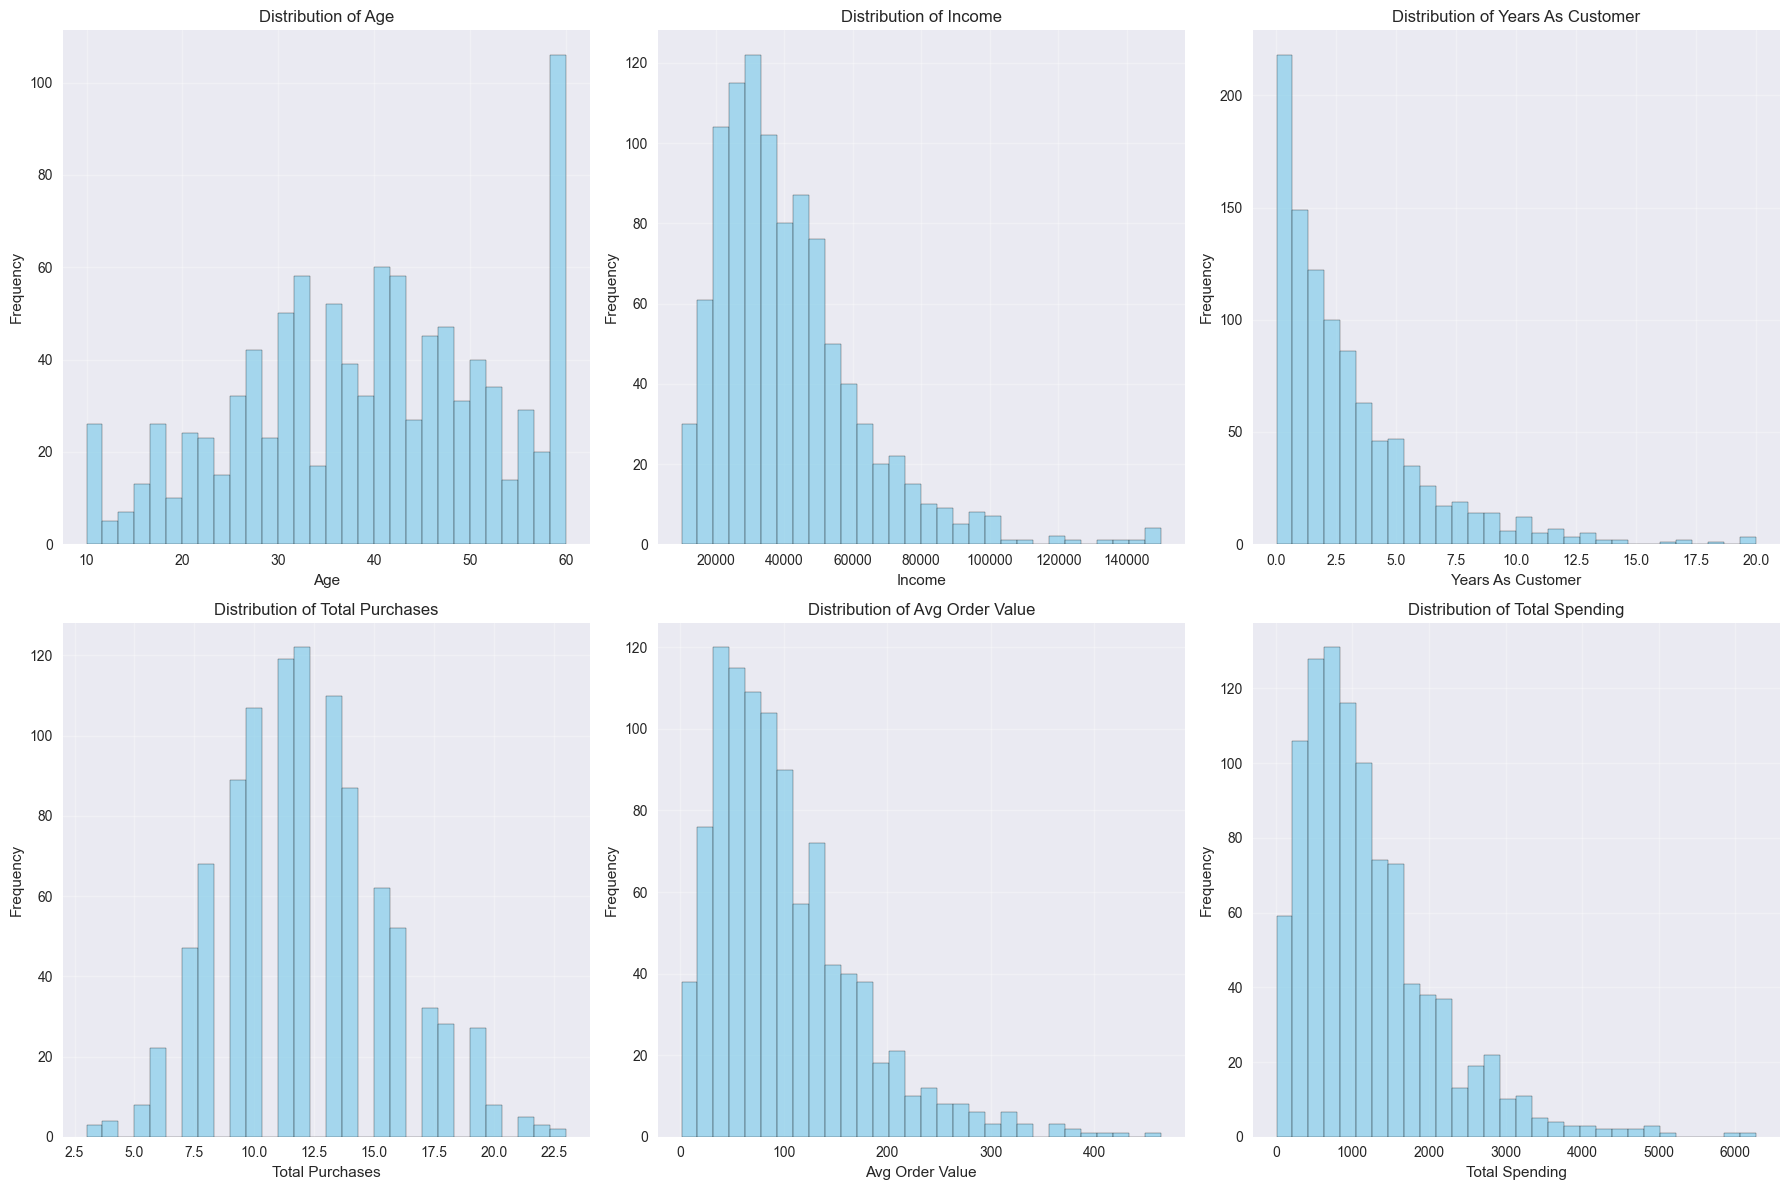

In [81]:
# Create histograms for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

numerical_vars = ['age', 'income', 'years_as_customer', 'total_purchases', 'avg_order_value', 'total_spending']

for i, var in enumerate(numerical_vars):
    axes[i].hist(df[var].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

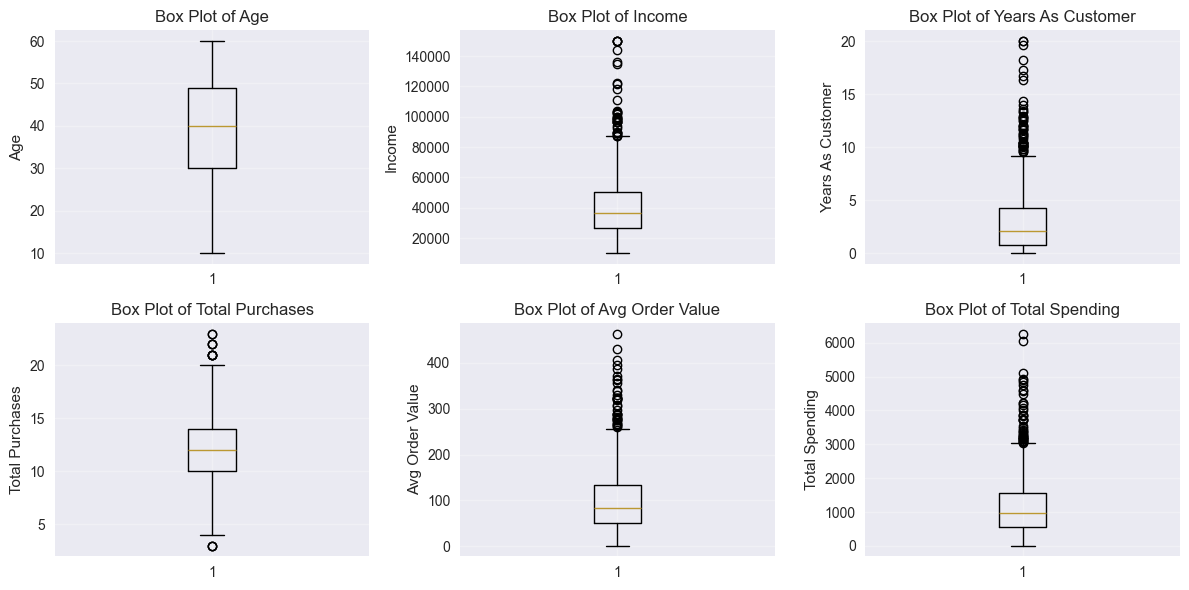

In [82]:
# Box plots to identify outliers
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

for i, var in enumerate(numerical_vars):
    axes[i].boxplot(df[var].dropna())
    axes[i].set_title(f'Box Plot of {var.replace("_", " ").title()}')
    axes[i].set_ylabel(var.replace("_", " ").title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Categorical Variable Analysis

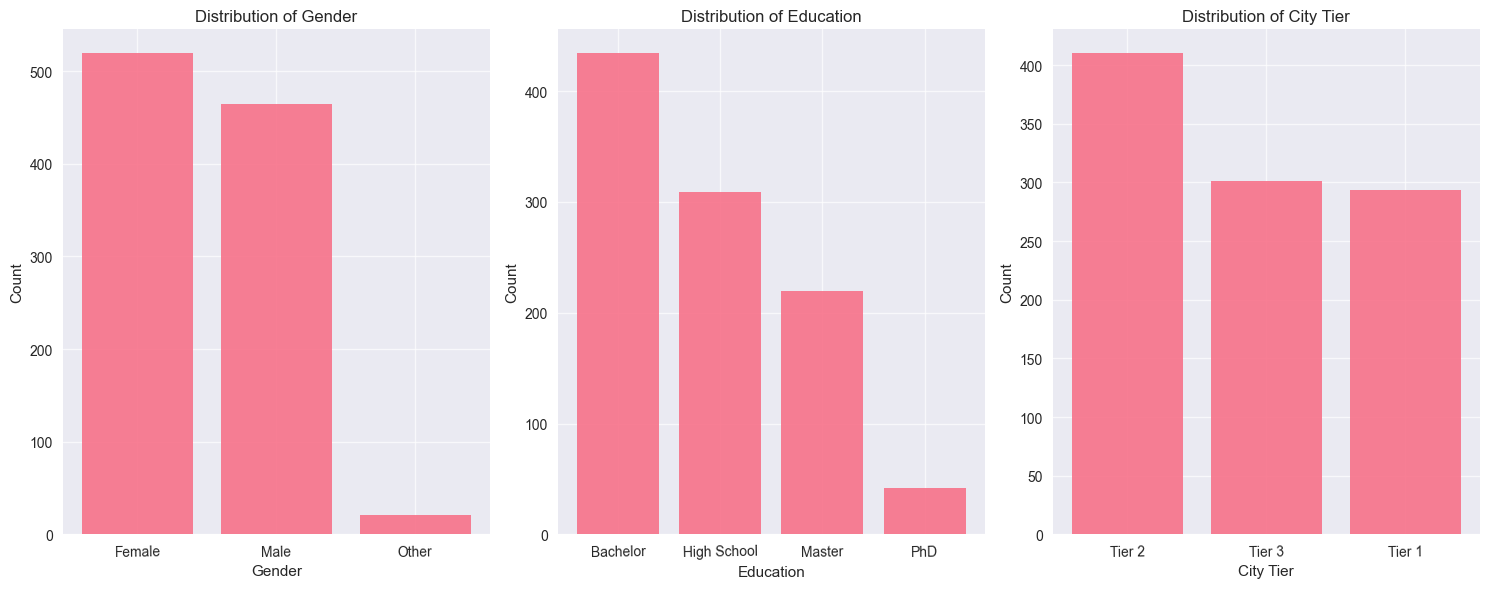

In [83]:
# Bar plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, var in enumerate(categorical_cols):
    value_counts = df[var].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, alpha=0.9)
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace("_", " ").title())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=1)
    axes[i].grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

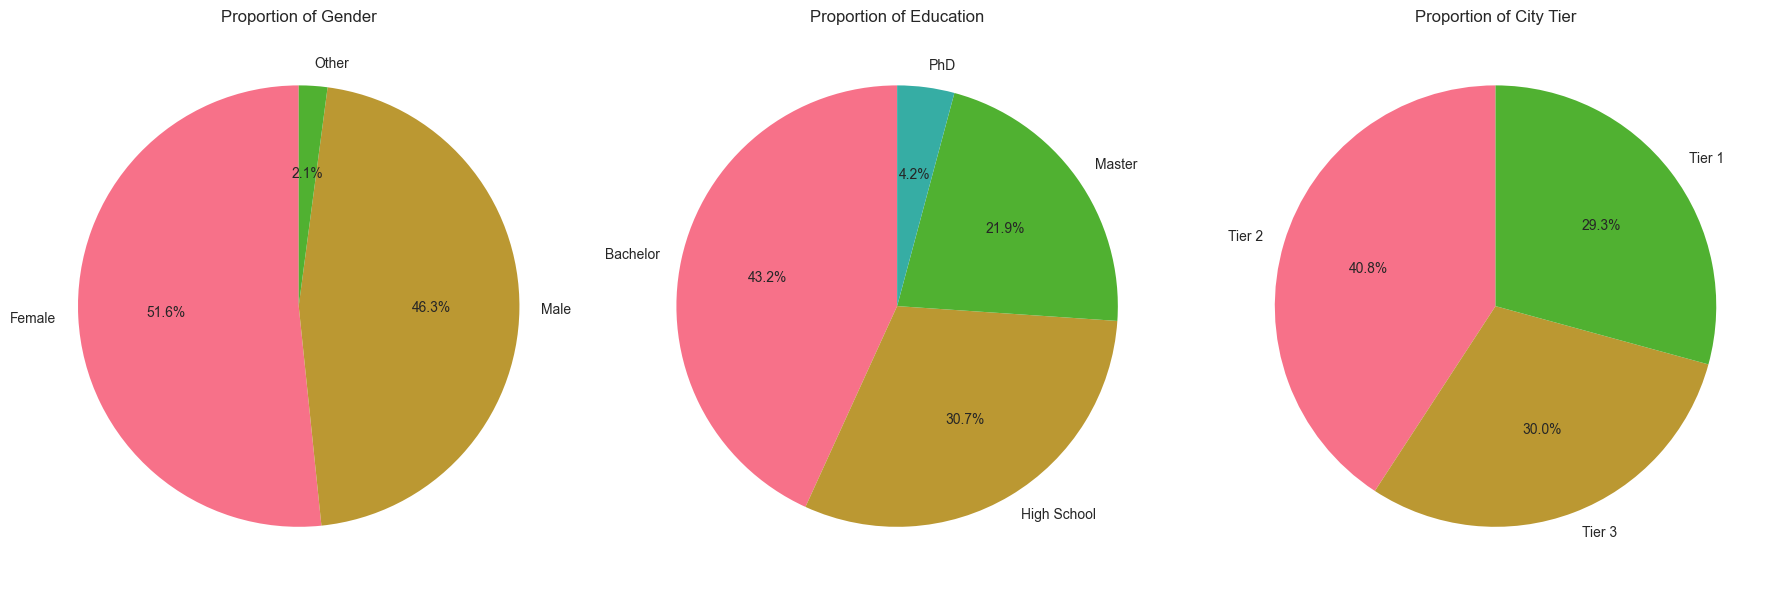

In [89]:
# Pie charts for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(categorical_cols):
    value_counts = df[var].value_counts()
    axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Proportion of {var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

### 4.3 Correlation Analysis

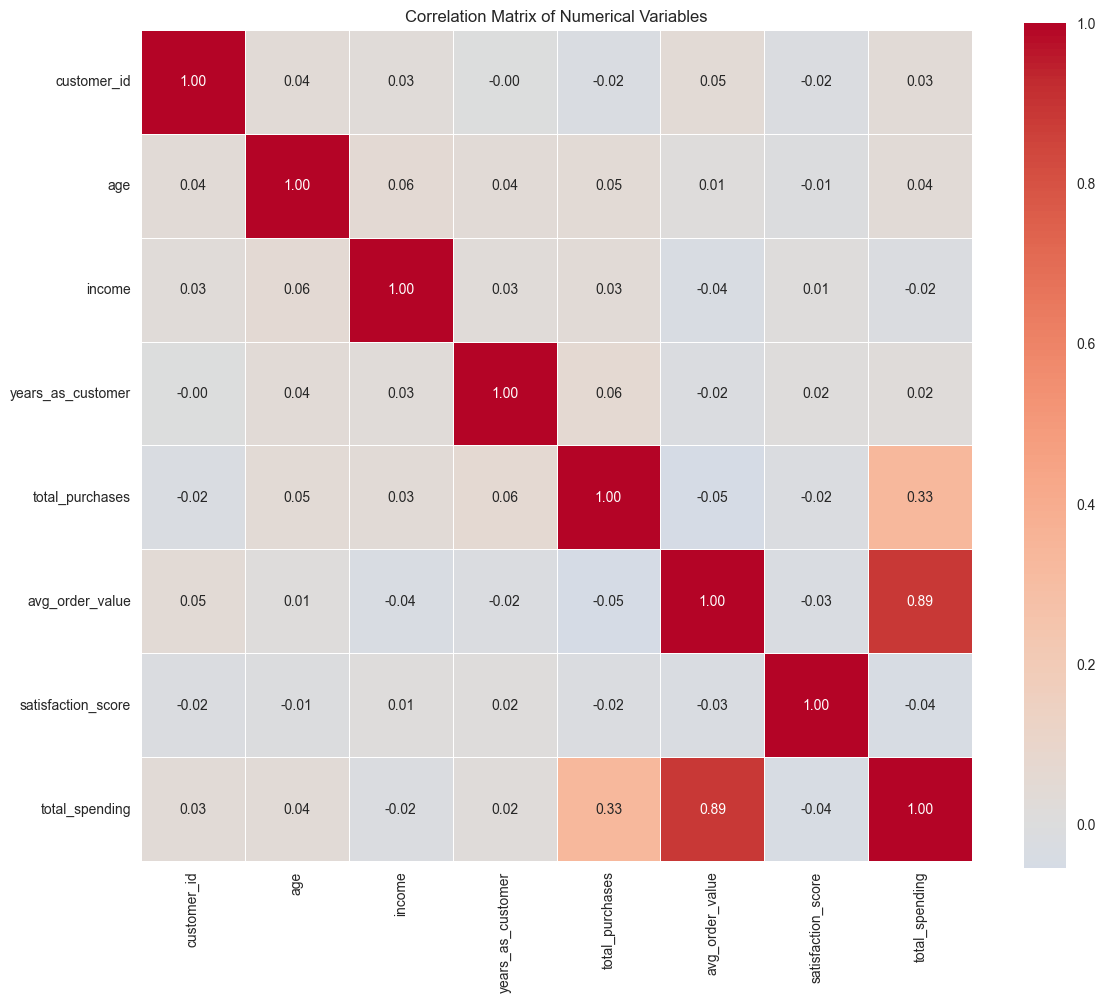

Strong Correlations (|r| > 0.5):
avg_order_value vs total_spending: 0.885


In [42]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print strong correlations
print("Strong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")

### 4.4 Relationship Analysis

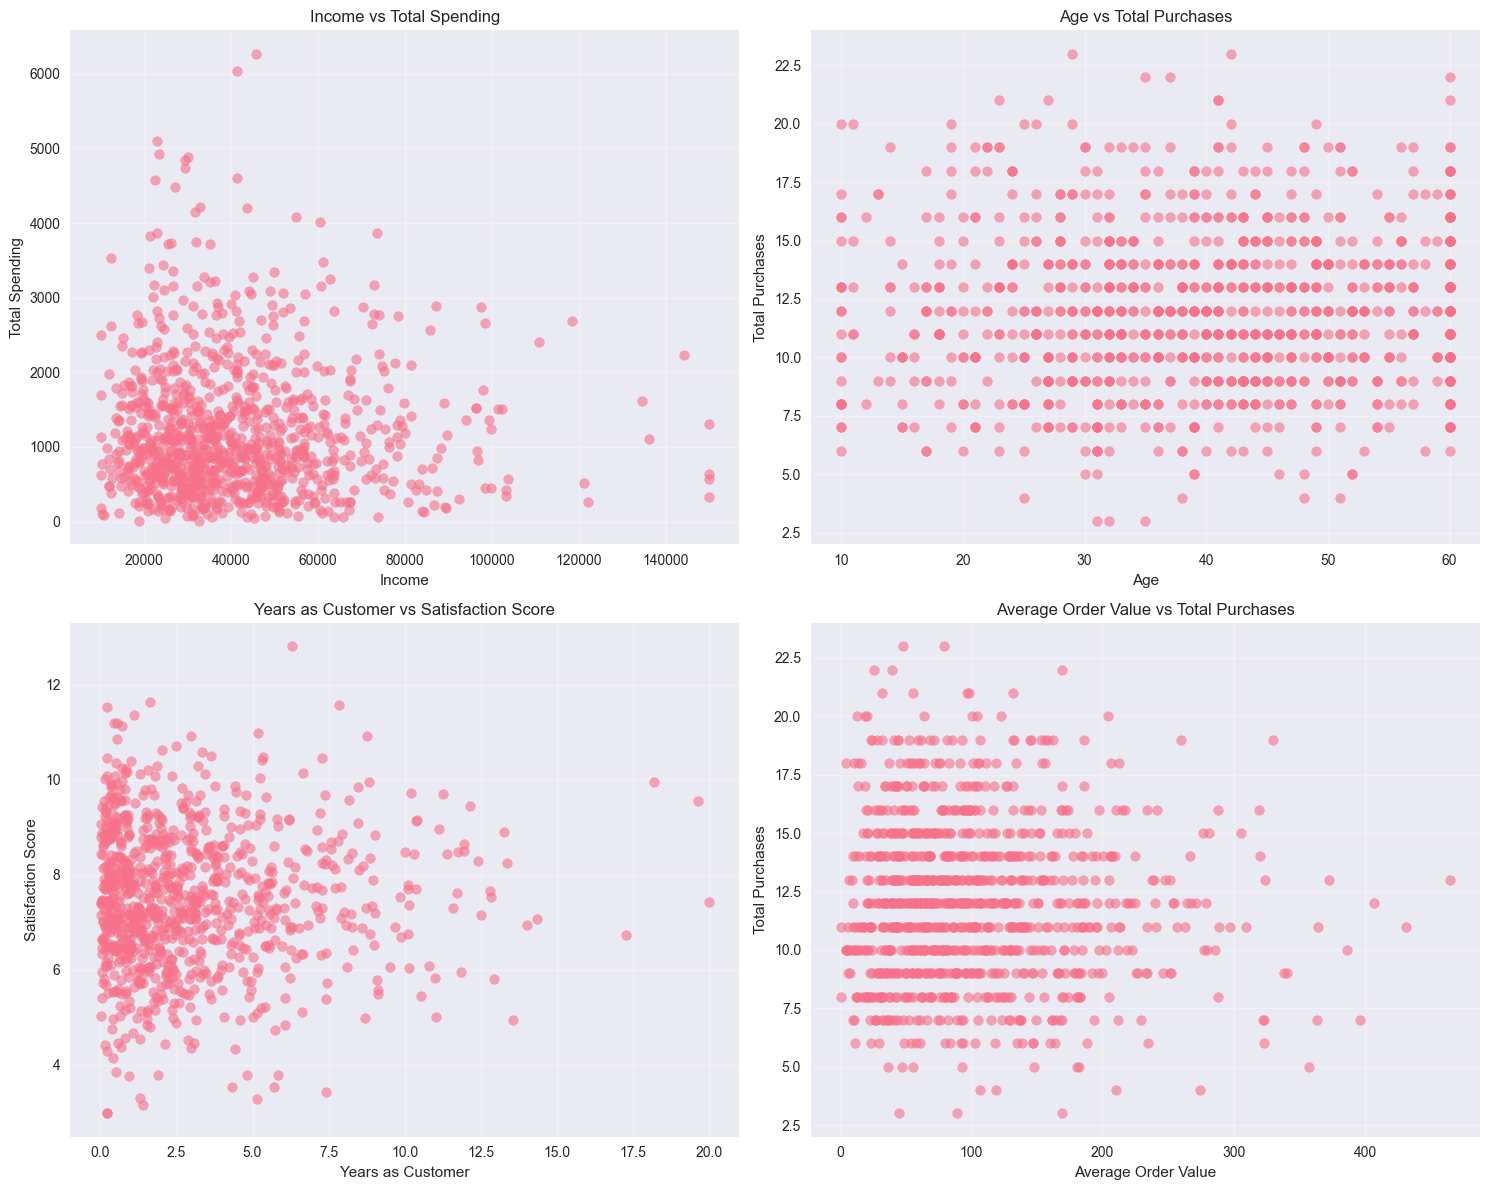

In [90]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Income vs Total Spending
axes[0, 0].scatter(df['income'], df['total_spending'], alpha=0.6)
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Total Spending')
axes[0, 0].set_title('Income vs Total Spending')
axes[0, 0].grid(True, alpha=0.3)

# Age vs Total Purchases
axes[0, 1].scatter(df['age'], df['total_purchases'], alpha=0.6)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Total Purchases')
axes[0, 1].set_title('Age vs Total Purchases')
axes[0, 1].grid(True, alpha=0.3)

# Years as Customer vs Satisfaction Score
axes[1, 0].scatter(df['years_as_customer'], df['satisfaction_score'], alpha=0.6)
axes[1, 0].set_xlabel('Years as Customer')
axes[1, 0].set_ylabel('Satisfaction Score')
axes[1, 0].set_title('Years as Customer vs Satisfaction Score')
axes[1, 0].grid(True, alpha=0.3)

# Average Order Value vs Total Purchases
axes[1, 1].scatter(df['avg_order_value'], df['total_purchases'], alpha=0.6)
axes[1, 1].set_xlabel('Average Order Value')
axes[1, 1].set_ylabel('Total Purchases')
axes[1, 1].set_title('Average Order Value vs Total Purchases')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.5 Group Analysis

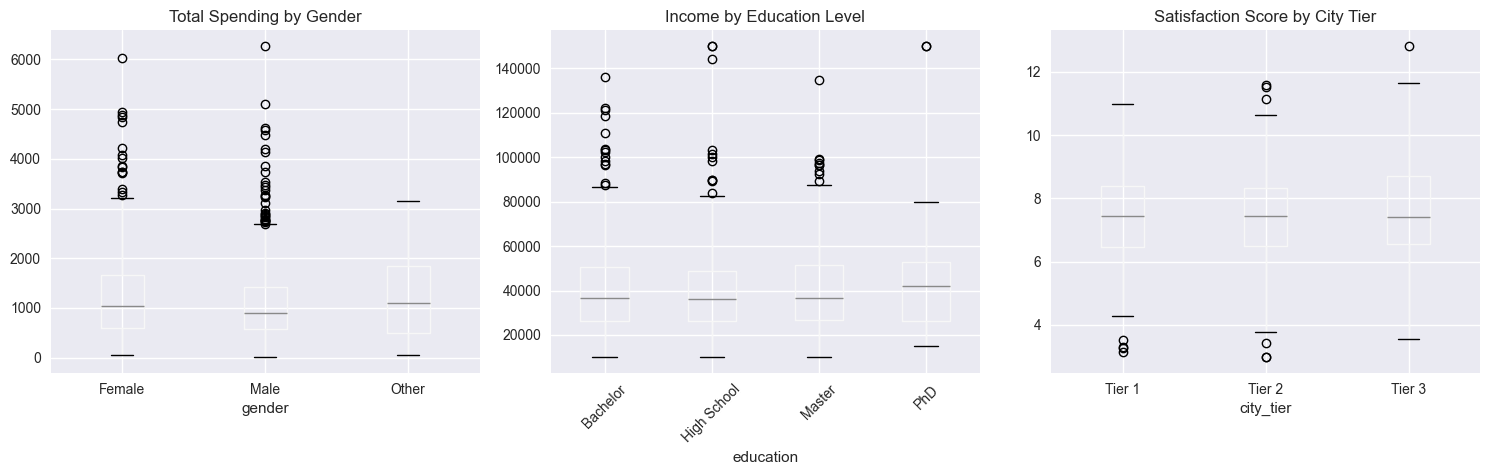

In [91]:
# Spending patterns by gender
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df.boxplot(column='total_spending', by='gender', ax=plt.gca())
plt.title('Total Spending by Gender')
plt.suptitle('')  # Remove default title

plt.subplot(1, 3, 2)
df.boxplot(column='income', by='education', ax=plt.gca())
plt.title('Income by Education Level')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
df.boxplot(column='satisfaction_score', by='city_tier', ax=plt.gca())
plt.title('Satisfaction Score by City Tier')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

In [93]:
# Group statistics
print("Average Total Spending by Gender:")
gender_spending = df.groupby('gender')['total_spending'].agg(['mean', 'median', 'std']).round(1)
print(gender_spending)

print("\nAverage Income by Education Level:")
education_income = df.groupby('education')['income'].agg(['mean', 'median', 'std']).round(1)
print(education_income)

print("\nAverage Satisfaction Score by City Tier:")
city_satisfaction = df.groupby('city_tier')['satisfaction_score'].agg(['mean', 'median', 'std']).round(1)
print(city_satisfaction)

Average Total Spending by Gender:
          mean  median    std
gender                       
Female  1254.3  1034.9  897.4
Male    1124.0   900.8  868.6
Other   1286.3  1091.7  955.3

Average Income by Education Level:
                mean   median      std
education                             
Bachelor     41166.5  36521.0  20764.4
High School  40387.8  36054.0  20518.0
Master       41235.1  36738.1  20696.5
PhD          45642.9  42204.9  28382.1

Average Satisfaction Score by City Tier:
           mean  median  std
city_tier                   
Tier 1      7.4     7.4  1.5
Tier 2      7.4     7.4  1.4
Tier 3      7.6     7.4  1.5


## Step 5: Advanced Visualizations

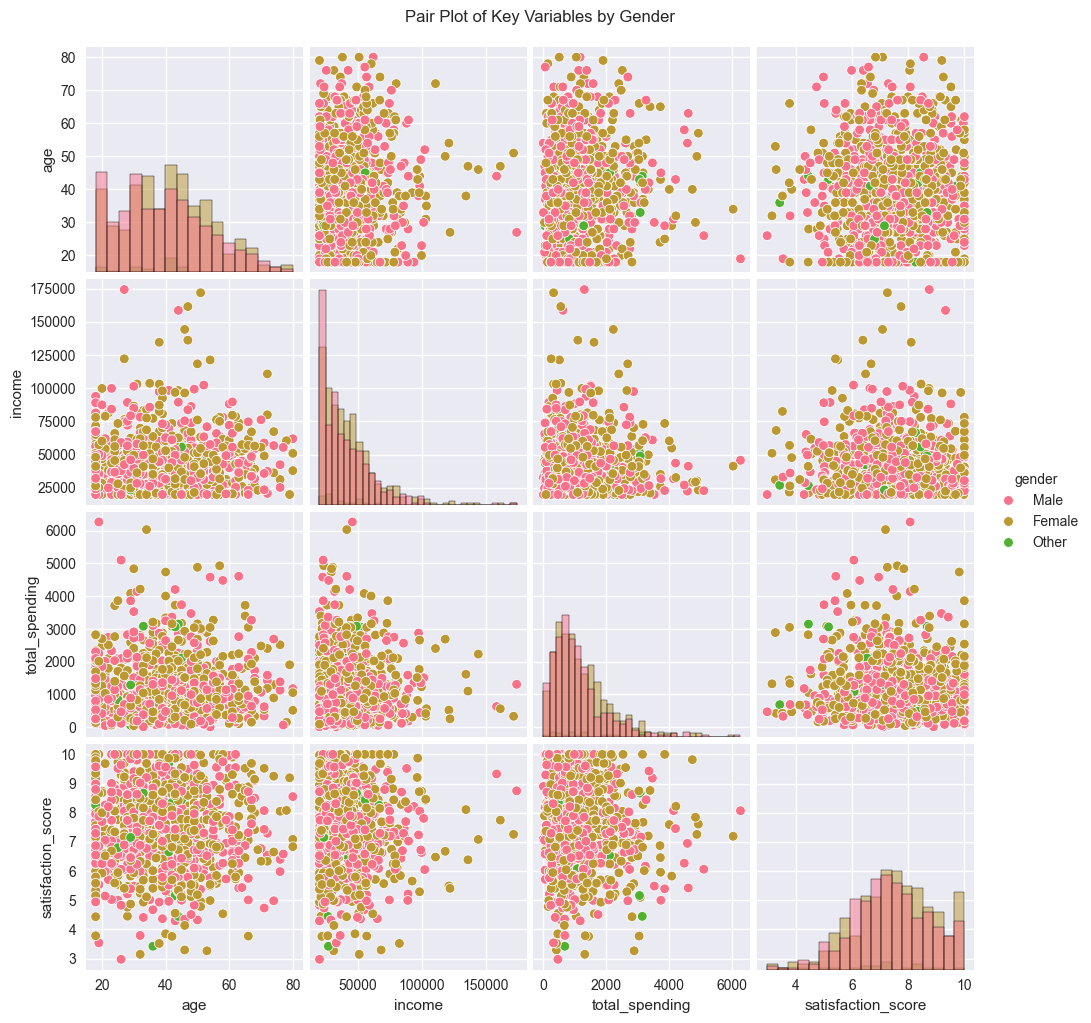

In [46]:
# Pair plot for key numerical variables
key_vars = ['age', 'income', 'total_spending', 'satisfaction_score']
sns.pairplot(df[key_vars + ['gender']].dropna(), hue='gender', diag_kind='hist')
plt.suptitle('Pair Plot of Key Variables by Gender', y=1.02)
plt.show()

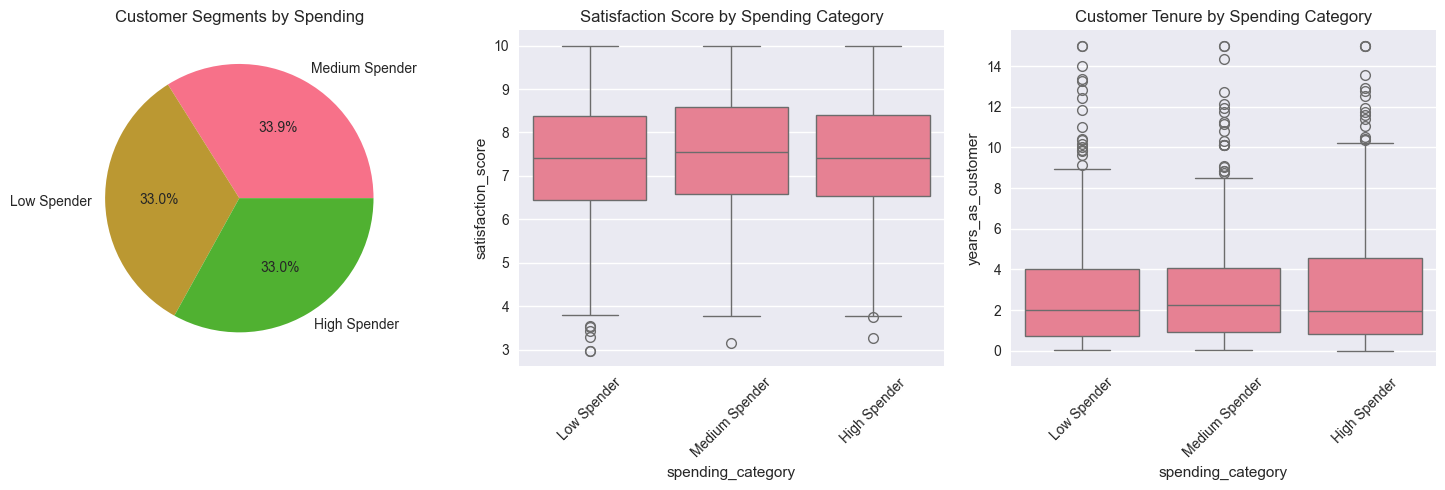

In [47]:
# Create customer segments based on spending and purchases
df['spending_category'] = pd.cut(df['total_spending'], 
                                bins=[0, df['total_spending'].quantile(0.33), 
                                     df['total_spending'].quantile(0.67), 
                                     df['total_spending'].max()],
                                labels=['Low Spender', 'Medium Spender', 'High Spender'])

# Visualize segments
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
segment_counts = df['spending_category'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Segments by Spending')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='spending_category', y='satisfaction_score')
plt.title('Satisfaction Score by Spending Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='spending_category', y='years_as_customer')
plt.title('Customer Tenure by Spending Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Step 6: Key Insights and Findings
Let's summarize our key findings from the EDA.

In [48]:
# Calculate key business metrics
print("=== KEY BUSINESS INSIGHTS ===")
print(f"\n📊 Dataset Overview:")
print(f"   • Total customers analyzed: {len(df):,}")
print(f"   • Data quality: {((len(df) - df.isnull().sum().sum()) / (len(df) * len(df.columns)) * 100):.1f}% complete")

print(f"\n💰 Financial Metrics:")
print(f"   • Average customer income: ${df['income'].mean():,.0f}")
print(f"   • Average total spending: ${df['total_spending'].mean():,.0f}")
print(f"   • Average order value: ${df['avg_order_value'].mean():.0f}")
print(f"   • Total revenue: ${df['total_spending'].sum():,.0f}")

print(f"\n👥 Customer Demographics:")
print(f"   • Average age: {df['age'].mean():.1f} years")
print(f"   • Gender distribution: {dict(df['gender'].value_counts())}")
print(f"   • Average customer tenure: {df['years_as_customer'].mean():.1f} years")

print(f"\n😊 Customer Satisfaction:")
print(f"   • Average satisfaction score: {df['satisfaction_score'].mean():.1f}/10")
print(f"   • Highly satisfied customers (>8): {len(df[df['satisfaction_score'] > 8])}/{len(df.dropna(subset=['satisfaction_score']))} ({len(df[df['satisfaction_score'] > 8])/len(df.dropna(subset=['satisfaction_score']))*100:.1f}%)")

print(f"\n🎯 Customer Segments:")
segment_stats = df.groupby('spending_category').agg({
    'total_spending': 'mean',
    'satisfaction_score': 'mean',
    'years_as_customer': 'mean'
}).round(2)
for segment in segment_stats.index:
    count = len(df[df['spending_category'] == segment])
    print(f"   • {segment}: {count} customers ({count/len(df)*100:.1f}%)")
    print(f"     - Avg spending: ${segment_stats.loc[segment, 'total_spending']:,.0f}")
    print(f"     - Avg satisfaction: {segment_stats.loc[segment, 'satisfaction_score']:.1f}/10")

=== KEY BUSINESS INSIGHTS ===

📊 Dataset Overview:
   • Total customers analyzed: 1,005
   • Data quality: 7.9% complete

💰 Financial Metrics:
   • Average customer income: $41,604
   • Average total spending: $1,195
   • Average order value: $101
   • Total revenue: $1,200,632

👥 Customer Demographics:
   • Average age: 40.1 years
   • Gender distribution: {'Female': np.int64(519), 'Male': np.int64(465), 'Other': np.int64(21)}
   • Average customer tenure: 3.0 years

😊 Customer Satisfaction:
   • Average satisfaction score: 7.5/10
   • Highly satisfied customers (>8): 337/954 (35.3%)

🎯 Customer Segments:
   • Low Spender: 332 customers (33.0%)
     - Avg spending: $413
     - Avg satisfaction: 7.4/10
   • Medium Spender: 341 customers (33.9%)
     - Avg spending: $990
     - Avg satisfaction: 7.6/10
   • High Spender: 332 customers (33.0%)
     - Avg spending: $2,186
     - Avg satisfaction: 7.4/10


## Challenge: Your Turn to Explore!
Now it's your turn to practice EDA skills. Complete the following tasks:

### Challenge 1: Create a new visualization
Create a visualization that shows the relationship between education level and average order value. What insights can you draw?

In [ ]:
# Your code here for Challenge 1
# Hint: Try using a bar plot or box plot


### Challenge 2: Identify the most valuable customer segment
Based on the data, identify which combination of characteristics (gender, education, city_tier) represents the most valuable customers.

In [ ]:
# Your code here for Challenge 2
# Hint: Use groupby with multiple columns and calculate mean total_spending


### Challenge 3: Data quality recommendations
Based on your analysis, what recommendations would you make to improve data quality?

**Your recommendations here:**
1. 
2. 
3. 

## Summary

Congratulations! You've completed a comprehensive EDA. Here's what you've learned:

### ✅ Key Skills Mastered:
1. **Data Loading and Inspection**: Using pandas to load and examine datasets
2. **Data Quality Assessment**: Identifying missing values, duplicates, and outliers
3. **Summary Statistics**: Calculating and interpreting descriptive statistics
4. **Data Visualization**: Creating effective plots with matplotlib and seaborn
5. **Pattern Recognition**: Identifying relationships and trends in data
6. **Business Insights**: Translating data findings into actionable insights

### 🔍 EDA Best Practices:
- Always start with basic data inspection (`head()`, `info()`, `describe()`)
- Check for data quality issues before analysis
- Use appropriate visualizations for different data types
- Look for patterns, outliers, and relationships
- Document your findings and insights
- Consider business context when interpreting results

### 🚀 Next Steps:
In the next lab, we'll learn how to clean and prepare this data for machine learning by:
- Handling missing values
- Encoding categorical variables
- Scaling numerical features
- Creating new features (feature engineering)

### 📚 Additional Resources:
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/)
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [EDA Best Practices](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)